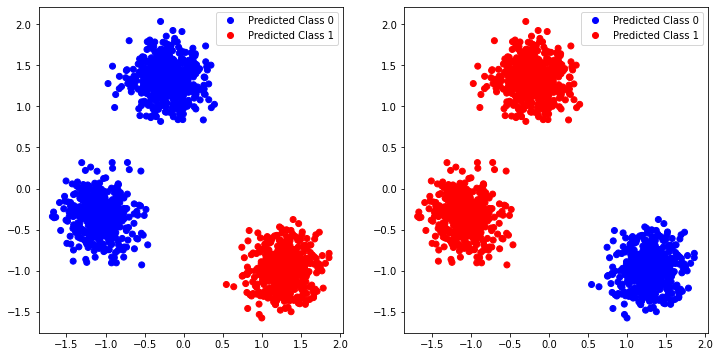

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score

n_samples = 1500
#X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

X, y = datasets.make_blobs(n_samples=n_samples, centers=3)

X = StandardScaler().fit_transform(X)

single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans = cluster.KMeans(n_clusters=2)
single.fit(X)
y1_pred = single.labels_.astype(np.int)
kmeans.fit(X)
y2_pred = kmeans.predict(X)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
legend_elems = [Line2D([0], [0], color=color, marker='o', linestyle='', label="Predicted Class {}".format(i))
                for i, color in enumerate(colors)]
ax[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_elems, loc='upper right')



In [5]:
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))    

Model 1 Silhouette Score: 0.690046141407108
Model 2 Silhouette Score: 0.690046141407108


In [ ]:
y2_pred

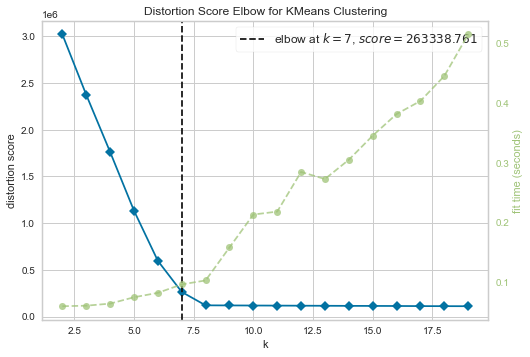

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=10000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [13]:
y

array([7, 6, 2, ..., 6, 3, 4])

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred


array([0, 2, 0, ..., 2, 2, 0], dtype=int32)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='RdYlGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

plt.show()


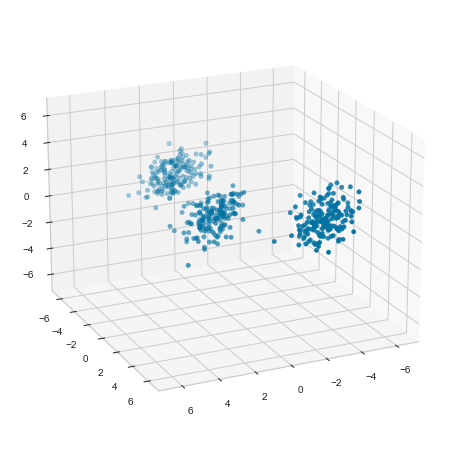

In [14]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()

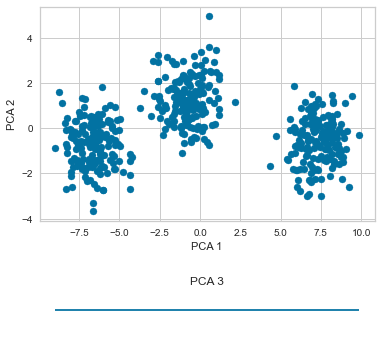

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, 'b|', ms='20')
ax[1].axis('off')

plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [ ]:
X[0]